## Support Vector Machine model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [4]:
data["DIAGNOSIS"].value_counts()

YES    270
NO      39
Name: DIAGNOSIS, dtype: int64

## Distribution of the classes

<AxesSubplot:xlabel='AGE', ylabel='SMOKING'>

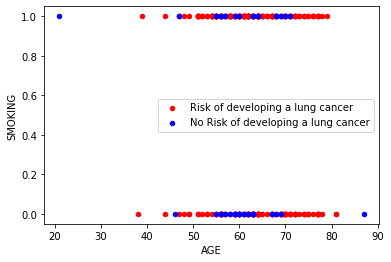

In [5]:
# Lung Cancer class
cancer = data[data["DIAGNOSIS"]== "YES"][0:309]

# No cancer class
no_cancer = data[data["DIAGNOSIS"]=="NO"][0:309]

#help(cancer.plot)

axes = cancer.plot(kind="scatter", x="AGE", y="SMOKING", color="red", label="Risk of developing a lung cancer")
no_cancer.plot(kind="scatter", x="AGE", y="SMOKING", color="blue", label="No Risk of developing a lung cancer", ax=axes)

## Identifying unwanted rows

In [6]:
# check our data type
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
DIAGNOSIS                object
dtype: object

In [61]:
# change object data type to numeric

#data = data[pd.to_numeric(data["GENDER"], errors="coerce").notnull()]
#data["GENDER"] = data["GENDER"].astype("int")
#data.LUNG_CANCER = [1 if value == "YES" else 0 for value in data.LUNG_CANCER]
#data["LUNG_CANCER"] = data["LUNG_CANCER"].astype("int")
#data.dtypes

In [8]:
data.DIAGNOSIS = [1 if value == "YES" else 0 for value in data.DIAGNOSIS]

## Creating the predictors dataframe

In [10]:
data.columns
predictors = data[['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]

# Convert into numpy array
# predictor variables
# X is denoted in capital as it denotes a multi-dimensional data and y denotes a 1-Dimensional data
X = np.asarray(predictors)

# target variable
y = np.asarray(data["DIAGNOSIS"])

y[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

## Divide data into training and testing parts

In [11]:
# In this case we will be testing on 30% of the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 216 x 14
X_train.shape

# 216 x 1
y_train.shape

# 93 x 14
X_test.shape

# 93 x 1
y_test.shape

(93,)

## Training the model

In [12]:
from sklearn import svm

# using Support Vector Classifier, need to specify the kernel type and the kernel coefficient
classifier = svm.SVC(kernel="linear", gamma="auto", C=2)

# Fitting the model
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [13]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [14]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

## Evaluation of the model

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.97


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93

